In [1]:
import numpy as np

# from PIL import Image
import itertools as it
# from scipy.stats import gaussian_kde

import requests
from bs4 import BeautifulSoup

import matplotlib
# from matplotlib import image
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
# from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']}) # if you want serif fonts, uncomment this
rc('text', usetex=True) # use latex fonts 
rc('axes', fc='w')
rc('figure', fc='w')
rc('savefig', fc='w')
rc('axes', axisbelow=True)

______________

# Exploring colors and colormaps
https://gka.github.io/palettes/#/9|s|00429d,96ffea,ffffe0|ffffe0,ff005e,93003a|1|1

In [2]:
namedColors = {'aliceblue': '#f0f8ff', 'antiquewhite': '#faebd7', 'aqua': '#0ff', 'aquamarine': '#7fffd4', 'azure': '#f0ffff', 'beige': '#f5f5dc', 'bisque': '#ffe4c4', 'black': '#000', 'blanchedalmond': '#ffebcd', 'blue': '#00f', 'blueviolet': '#8a2be2', 'brown': '#a52a2a', 'burlywood': '#deb887', 'cadetblue': '#5f9ea0', 'chartreuse': '#7fff00', 'chocolate': '#d2691e', 'coral': '#ff7f50', 'cornflowerblue': '#6495ed', 'cornsilk': '#fff8dc', 'crimson': '#dc143c', 'cyan': '#0ff', 'darkblue': '#00008b', 'darkcyan': '#008b8b', 'darkgoldenrod': '#b8860b', 'darkgray': '#a9a9a9', 'darkgrey': '#a9a9a9', 'darkgreen': '#006400', 'darkkhaki': '#bdb76b', 'darkmagenta': '#8b008b', 'darkolivegreen': '#556b2f', 'darkorange': '#ff8c00', 'darkorchid': '#9932cc', 'darkred': '#8b0000', 'darksalmon': '#e9967a', 'darkseagreen': '#8fbc8f', 'darkslateblue': '#483d8b', 'darkslategray': '#2f4f4f', 'darkslategrey': '#2f4f4f', 'darkturquoise': '#00ced1', 'darkviolet': '#9400d3', 'deeppink': '#ff1493', 'deepskyblue': '#00bfff', 'dimgray': '#696969', 'dimgrey': '#696969', 'dodgerblue': '#1e90ff', 'firebrick': '#b22222', 'floralwhite': '#fffaf0', 'forestgreen': '#228b22', 'fuchsia': '#f0f', 'gainsboro': '#dcdcdc', 'ghostwhite': '#f8f8ff', 'gold': '#ffd700', 'goldenrod': '#daa520', 'gray': '#808080', 'grey': '#808080', 'green': '#008000', 'greenyellow': '#adff2f', 'honeydew': '#f0fff0', 'hotpink': '#ff69b4', 'indianred': '#cd5c5c', 'indigo': '#4b0082', 'ivory': '#fffff0', 'khaki': '#f0e68c', 'lavender': '#e6e6fa', 'lavenderblush': '#fff0f5', 'lawngreen': '#7cfc00', 'lemonchiffon': '#fffacd', 'lightblue': '#add8e6', 'lightcoral': '#f08080', 'lightcyan': '#e0ffff', 'lightgoldenrodyellow': '#fafad2', 'lightgray': '#d3d3d3', 'lightgrey': '#d3d3d3', 'lightgreen': '#90ee90', 'lightpink': '#ffb6c1', 'lightsalmon': '#ffa07a', 'lightseagreen': '#20b2aa', 'lightskyblue': '#87cefa', 'lightslategray': '#789', 'lightslategrey': '#789', 'lightsteelblue': '#b0c4de', 'lightyellow': '#ffffe0', 'lime': '#0f0', 'limegreen': '#32cd32', 'linen': '#faf0e6', 'magenta': '#f0f', 'maroon': '#800000', 'mediumaquamarine': '#66cdaa', 'mediumblue': '#0000cd', 'mediumorchid': '#ba55d3', 'mediumpurple': '#9370d8', 'mediumseagreen': '#3cb371', 'mediumslateblue': '#7b68ee', 'mediumspringgreen': '#00fa9a', 'mediumturquoise': '#48d1cc', 'mediumvioletred': '#c71585', 'midnightblue': '#191970', 'mintcream': '#f5fffa', 'mistyrose': '#ffe4e1', 'moccasin': '#ffe4b5', 'navajowhite': '#ffdead', 'navy': '#000080', 'oldlace': '#fdf5e6', 'olive': '#808000', 'olivedrab': '#6b8e23', 'orange': '#ffa500', 'orangered': '#ff4500', 'orchid': '#da70d6', 'palegoldenrod': '#eee8aa', 'palegreen': '#98fb98', 'paleturquoise': '#afeeee', 'palevioletred': '#d87093', 'papayawhip': '#ffefd5', 'peachpuff': '#ffdab9', 'peru': '#cd853f', 'pink': '#ffc0cb', 'plum': '#dda0dd', 'powderblue': '#b0e0e6', 'purple': '#800080', 'rebeccapurple': '#639', 'red': '#f00', 'rosybrown': '#bc8f8f', 'royalblue': '#4169e1', 'saddlebrown': '#8b4513', 'salmon': '#fa8072', 'sandybrown': '#f4a460', 'seagreen': '#2e8b57', 'seashell': '#fff5ee', 'sienna': '#a0522d', 'silver': '#c0c0c0', 'skyblue': '#87ceeb', 'slateblue': '#6a5acd', 'slategray': '#708090', 'slategrey': '#708090', 'snow': '#fffafa', 'springgreen': '#00ff7f', 'steelblue': '#4682b4', 'tan': '#d2b48c', 'teal': '#008080', 'thistle': '#d8bfd8', 'tomato': '#ff6347', 'turquoise': '#40e0d0', 'violet': '#ee82ee', 'wheat': '#f5deb3', 'white': '#fff', 'whitesmoke': '#f5f5f5', 'yellow': '#ff0', 'yellowgreen': '#9acd32'}

colorblind_mappings = {'Protanopia':'Dichromacy',
                       'Deuteranopia':'Dichromacy',
                       'Tritanopia':'Dichromacy',
                       'Protanomaly':'Trichromacy',
                       'Deuteranomaly':'Trichromacy',
                       'Tritanomaly':'Trichromacy',
                       'Achromatopsia':'Monochromacy',
                       'Achromatomaly':'Monochromacy'}

all_vals = ['Original Color', 'Protanopia', 'Deuteranopia', #'Tritanopia',
            'Protanomaly', 'Deuteranomaly', #'Tritanomaly',
            'Achromatopsia', 'Achromatomaly', 'Grayscale']

colorblind_rates = {'Original Color':"",
                    'Protanopia':' - m: 2.4\%; f: 0.02\%',
                    'Deuteranopia':' - m: 1.2\%; f: 0.01\%',
                    # 'Tritanopia':' - m: 0.001\%; f: 0.03\%',
                    'Protanomaly':' - m: 1.3\%; f: 0.02\%',
                    'Deuteranomaly':' - m: 5.0\%; f: 0.35\%',
                    # 'Tritanomaly':' - m: 0.0001\%; f: 0.0001\%',
                    'Achromatopsia':' - ~0.003\%',
                    'Achromatomaly':'',
                    'Grayscale':''}

In [4]:
fs = 10.0
lw = 2.25
fig_w1 = 7.0
fig_h1 = 3.0
al = 0.9
labcol = '.1'

pe1 = [path_effects.Stroke(linewidth=lw*1.1, foreground='w',alpha=al), path_effects.Normal()]
pe2 = [path_effects.Stroke(linewidth=1.0, foreground='w'), path_effects.Normal()]
pe3 = [path_effects.Stroke(linewidth=0.2, foreground='.1'), path_effects.Normal()]

In [3]:
cols = {'prior':'.75',
        'posterior':'#01497c',
        'likelihood':'#C74769'}

cols1 = ['#008795', '#4092aa', '#629cc0', '#7fa6d6', '#e69d93', '#dea8ab', '#d5b4c4', '#c8c0dd']
cols2 = ['#008795', '#629cc0', '#dea8ab', '#c8c0dd']

In [6]:
def get_colorblindness_colors(hex_col, colorblind_types='all'):
    """
    Generates color representations for various types of colorblindness.

    Parameters
    ----------
    hex_col (str or tuple)
        The color you wish to check, in hex code format e.g. "#ffffff" or rgb
        format e.g. (1,255,20)

    colorblind_types (str or list)
        If "all", the function returns a dictionary with all of the following:
            Protanopia - ("Dichromat" family)
                The viewer sees no red.
            Deuteranopia - ("Dichromat" family)
                The viewer sees no green.
            Tritanopia - ("Dichromat" family)
                The viewer sees no blue.
            Protanomaly - ("Anomalous Trichromat" family)
                The viewer sees low amounts of red.
            Deuteranomaly - ("Anomalous Trichromat" family).
                The viewer sees low amounts of green.
            Tritanomaly - ("Anomalous Trichromat" family).
                The viewer sees low amounts of blue.
            Achromatopsia - ("Monochromat" family)
                The viewer sees no color at all.
            Achromatomaly - ("Monochromat" family)
                The viewer sees low amounts of color.

    Returns
    -------
    colorblind_output (dict)
        dictionary where the keys are the type of colorblindness and the values
        are the re-colored version of your original hex_col. This also includes
        a grayscale version of the color.
    """
    all_vals = ['Original Color', 'Protanopia', 'Deuteranopia', #'Tritanopia',
                'Protanomaly', 'Deuteranomaly', #'Tritanomaly', 
                'Achromatopsia',
                'Achromatomaly', 'Grayscale']

    if type(hex_col)!=str:
        if len(hex_col)!=3:
            print('Input a hex color please.')
            return ''
        else:
            hex_col = rgb_to_hex(hex_col)
    else:
        if "#" not in hex_col and len(hex_col)!=6:
            try:
                hex_col = namedColors[hex_col]
            except:
                print('Input a hex color please.')
                return ''

    base_url = 'https://convertingcolors.com/'
    hex_url = base_url + 'hex-color-%s.html'%hex_col.replace("#",'')
    print(hex_url)
    reqs = requests.get(hex_url)
    soup = BeautifulSoup(reqs.text, 'html.parser')

    colorblind_sec = soup.find_all('details',{'id':'blindness-simulation'})[0]
    colorblind_labels = [i.text for i in colorblind_sec.find_all('h3')]
    # colorblind_colors = np.unique([i.text for i in colorblind_sec.find_all('div')])
    tmp = np.unique([i.text for i in colorblind_sec.find_all('div')])
    colorblind_colors = [i for i in tmp for x in all_vals[1:] if x in i and all_vals[0] not in i]

    colorblind_output = {"Original Color":hex_col}

    # for i in colorblind_mappings.keys():
    #     for j in colorblind_colors:
    #         # if i in j:
    #         hex_col_j = j
    #         colorblind_output[i] = hex_col_j
    for i in colorblind_mappings.keys():
        for j in colorblind_colors:
            if i in j:
                hex_col_j = "#"+j.split('%')[-1]
                # hex_col_j = j.replace(i,'#')
                colorblind_output[i] = hex_col_j

    if colorblind_types!='all':
        if type(colorblind_types) == str:
            colorblind_types = [colorblind_types]

        new_out = {'Original Color':hex_col}
        for c in colorblind_types:
            new_out[c] = colorblind_output[c]

        colorblind_output = new_out

    colorblind_output['Grayscale'] = hex_to_grayscale(hex_col)
    for xx in all_vals:
        if xx not in list(colorblind_output.keys()):
            colorblind_output[xx] = hex_col

    return {hex_col:colorblind_output}

def rgb_to_hsv(rgb):
    """
    Converts an RGB color to HSV format.

    Parameters
    ----------
    rgb : tuple of ints
        A tuple containing the RGB values (R, G, B) where each value is in the
        range 0 to 255.

    Returns
    -------
    numpy.ndarray
        An array representing the HSV equivalent of the input RGB values.
    """
    rgb = np.array(rgb)
    rgb = rgb.astype('float')
    maxv = np.amax(rgb)
    maxc = np.argmax(rgb)
    minv = np.amin(rgb)
    minc = np.argmin(rgb)

    hsv = np.zeros(rgb.shape, dtype='float')
    hsv[maxc == minc, 0] = np.zeros(hsv[maxc == minc, 0].shape)
    hsv[maxc == 0, 0] = (((rgb[..., 1] - rgb[..., 2]) * 60.0 /\
                          (maxv - minv + np.spacing(1))) % 360.0)[maxc == 0]
    hsv[maxc == 1, 0] = (((rgb[..., 2] - rgb[..., 0]) * 60.0 /\
                          (maxv - minv + np.spacing(1))) + 120.0)[maxc == 1]
    hsv[maxc == 2, 0] = (((rgb[..., 0] - rgb[..., 1]) * 60.0 /\
                          (maxv - minv + np.spacing(1))) + 240.0)[maxc == 2]
    hsv[maxv == 0, 1] = np.zeros(hsv[maxv == 0, 1].shape)
    hsv[maxv != 0, 1] = (1 - minv / (maxv + np.spacing(1)))[maxv != 0]
    hsv[..., 2] = maxv/255

    return hsv

def lightness(hex_col):
    """
    Calculates the perceived lightness of a color.

    Parameters
    ----------
    hex_col : str
        A hex code representing the color (e.g., "#ffffff").

    Returns
    -------
    float
        The perceived lightness of the color, ranging from 0 (dark) to 1 (light).
    """    
    rgb = hex_to_rgb(hex_col)
    r,g,b = rgb
    denominator = 255 * (0.299 + 0.587 + 0.111)**(0.5)
    L = (0.299 * r**2 + 0.587 * g**2 + 0.111 * b**2)**(0.5) / denominator

    return L

def saturation(hex_col):
    """
    Calculates the saturation of a given hex color.

    Parameters
    ----------
    hex_col : str
        A hex code representing the color (e.g., "#ffffff").

    Returns
    -------
    float
        The saturation value ranging from 0 (unsaturated, grayscale) to 1 (fully saturated).
    """
    hsv = rgb_to_hsv(hex_to_rgb(hex_col))

    return hsv[1]

def hue(hex_col):
    """
    Calculates the hue of a given hex color.

    Parameters
    ----------
    hex_col : str
        A hex code representing the color (e.g., "#ffffff").

    Returns
    -------
    float
        The hue value in degrees, ranging from 0 to 360.
    """
    hsv = rgb_to_hsv(hex_to_rgb(hex_col))

    return hsv[0]

def rgb_to_hex(rgb):
    """
    Converts an RGB color to hex format.

    Parameters
    ----------
    rgb : tuple of ints
        A tuple containing the RGB values (R, G, B) where each value is in the
        range 0 to 255.

    Returns
    -------
    str
        The hex code representation of the RGB color.
    """
    r,g,b=rgb

    return '#%02x%02x%02x' % (r,g,b)

def hex_to_rgb(value):
    """
    Converts a hex color code to an RGB tuple.

    Parameters
    ----------
    value : str
        A hex code representing the color (e.g., "#ffffff").

    Returns
    -------
    tuple of ints
        A tuple containing the RGB values (R, G, B) where each value is in the range 0 to 255.
    """
    value = value.lstrip('#')
    lv = len(value)

    return tuple(int(value[i:i+lv//3], 16) for i in range(0, lv, lv//3))

def hex_to_grayscale(hex_col):
    """
    Converts a hex color code to its grayscale equivalent.

    Parameters
    ----------
    hex_col : str
        A hex code representing the color (e.g., "#ffffff").

    Returns
    -------
    str
        The grayscale value of the color as a normalized float (0.0 to 1.0).
    """
    img = hex_to_rgb(hex_col)
    R, G, B = img
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B    

    return '%.7f'%(imgGray/255)

# Test Colormap 1

In [7]:
cmap_name = 'Test Colormap 1'
cols1 = ['#008795', '#4092aa', '#629cc0', '#7fa6d6',
         '#e69d93', '#dea8ab', '#d5b4c4', '#c8c0dd']
cols1_dict = {}
for col in cols1:
    col1_dict = get_colorblindness_colors(col)
    cols1_dict[col] = col1_dict[col]

https://convertingcolors.com/hex-color-008795.html
https://convertingcolors.com/hex-color-4092aa.html
https://convertingcolors.com/hex-color-629cc0.html
https://convertingcolors.com/hex-color-7fa6d6.html
https://convertingcolors.com/hex-color-e69d93.html
https://convertingcolors.com/hex-color-dea8ab.html
https://convertingcolors.com/hex-color-d5b4c4.html
https://convertingcolors.com/hex-color-c8c0dd.html


In [8]:
all_vals = ['Original Color', 'Protanopia', 'Deuteranopia', 'Tritanopia',
            'Protanomaly', 'Deuteranomaly', 'Tritanomaly',
            'Achromatopsia',
            'Achromatomaly', 'Grayscale']

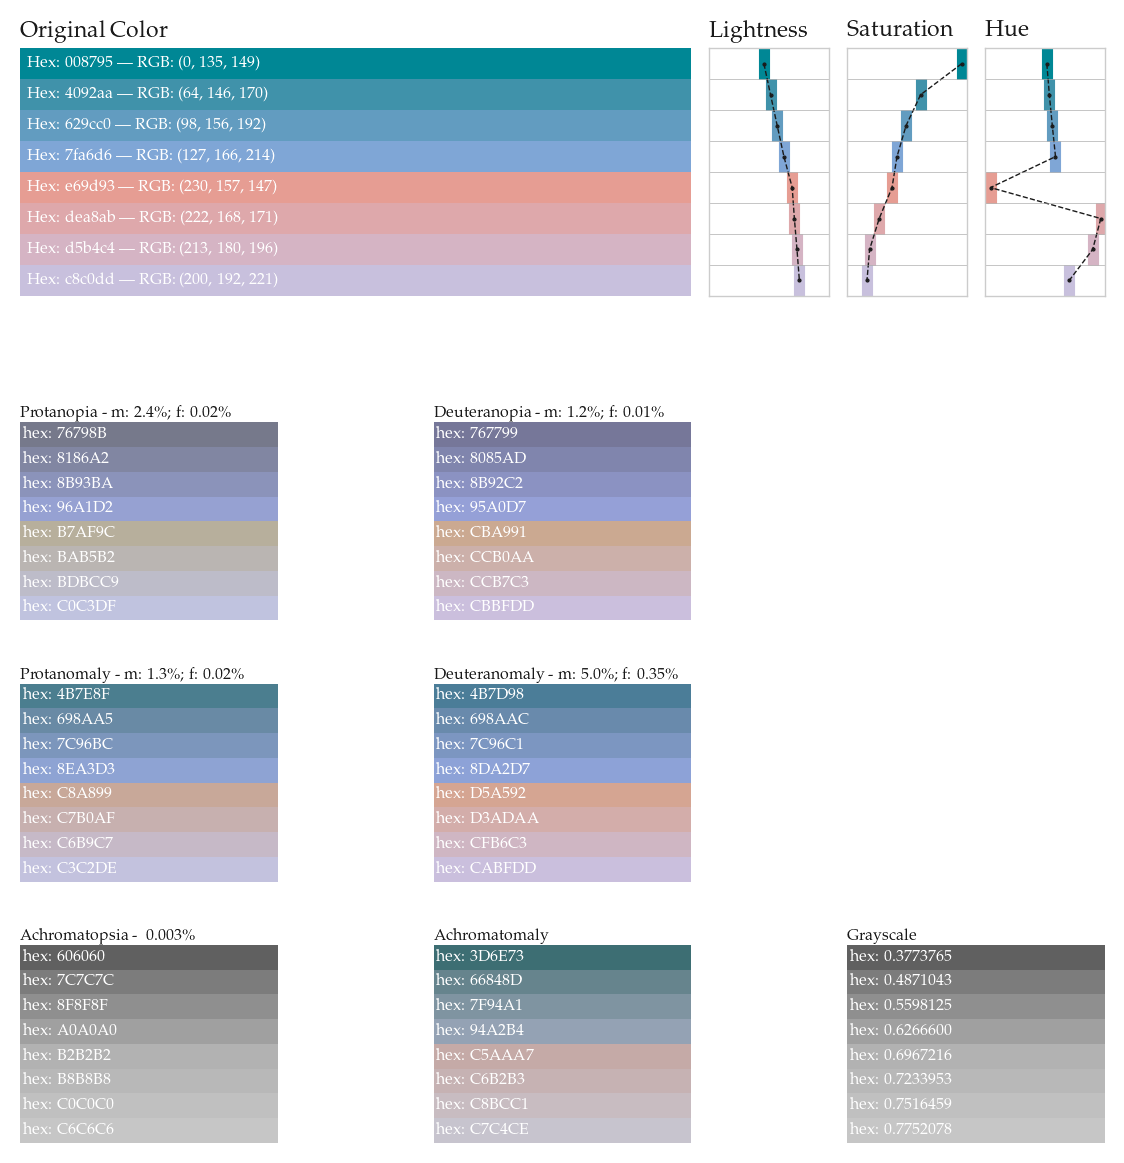

In [9]:
w = 2.0
h = 2.0
ncols = 3
nrows = 3
tups = list(it.product(range(nrows), range(ncols)))
tups = [(i[0]+2,i[1]) for i in tups]

fig = plt.figure(figsize=(7,3.25+len(cols1)*0.5),dpi=200)
plt.subplots_adjust(wspace=0.15,hspace=0.175+0.025*len(cols1))
gs = fig.add_gridspec(5,8,height_ratios=[1.25,0,1,1,1])

for i,cb in enumerate(all_vals):
    if i == 0:
        axi = fig.add_subplot(gs[0,0:5])
    else:
        axi = fig.add_subplot(gs[tups[i-1][0],(tups[i-1][1]*3):(tups[i-1][1]*3)+2])

    if cb in ['Tritanopia','Tritanomaly']:
        axi.set_axis_off()
        continue

    cols1_dict_cb = [cols1_dict[col][cb] for col in cols1]
    rv0 = 1/len(cols1_dict_cb)
    for li,rv in enumerate(np.linspace(rv0,1,len(cols1_dict_cb))):
        lv = rv-rv0
        axi.fill_between([0,1],lv,rv,lw=0,color=cols1_dict_cb[li])
        if i == 0:
            ttt = "Hex: %s"%cols1_dict_cb[li].replace('#','')
            ttt = ttt + ' --- RGB: %s'%str(hex_to_rgb(cols1_dict_cb[li]))
            axi.text(0.99,(lv+rv)/2,ttt,
                     color='w', fontsize='xx-small',ha='left',va='center')
            
        else:
            axi.text(0.99,(lv+rv)/2,"hex: %s"%cols1_dict_cb[li].replace('#',''),
                     color='w', fontsize='xx-small',ha='left',va='center')

    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_xlim(1,0)
    axi.set_ylim(1,0)
    axi.set_axis_off()
    if i == 0:
        axi.set_title(cb,ha='left',x=0,color=labcol,va='top',
                      y=1.01+len(cols1)*0.005,fontsize='small')
    else:
        axi.set_title(cb+colorblind_rates[cb],ha='left',x=0,color=labcol,
                      va='top',y=1.0,fontsize='xx-small')

lightn = [lightness(c) for c in cols1]
saturn = [saturation(c) for c in cols1]
huen = [hue(c) for c in cols1]
titles = ['Lightness','Saturation','Hue']
ylims = [(-0.05, 1.05),(-0.05, 1.05),(-10, 370)]
for vi,v in enumerate([lightn,saturn,huen]):
    axi = fig.add_subplot(gs[0,vi+5])
    axi.vlines(v,[i+0 for i in range(len(cols1))],
                 [i+1 for i in range(len(cols1))], color=cols1, lw=4)
    axi.plot(v,[i+0.5 for i in range(len(cols1))],color=labcol,
             lw=0.5, ls='--',marker='.',markersize=1)

    axi.set_title(titles[vi],ha='left',x=0,color=labcol,va='top',
                   y=1.01+len(cols1)*0.005,fontsize='small')

    axi.set_ylim(len(cols1),0)
    axi.hlines(np.linspace(1,len(cols1),len(cols1)),
               ylims[vi][0],ylims[vi][1], lw=0.2, color='.6')
    axi.set_xlim(ylims[vi][0],ylims[vi][1])
    axi.set_xticks([])
    axi.set_yticks([])
    axi.tick_params(pad=2, colors='.3', length=0)
    for r in ['bottom','top','right','left']:
        axi.spines[r].set_color('.8')
        axi.spines[r].set_linewidth(0.5)


plt.savefig('images/pngs/color_explorer_%s.png'%cmap_name.replace(' ',''),
            dpi=600,bbox_inches='tight')
plt.savefig('images/pdfs/color_explorer_%s.pdf'%cmap_name.replace(' ',''),
            bbox_inches='tight')
plt.show()

______________

# Test Colormap 2

In [9]:
cmap_name = 'Test Colormap 2'
cols1 = ['#DAAA62','#1E638F','#C3687D']
cols1_dict = {}
for col in cols1:
    col1_dict = get_colorblindness_colors(col)
    cols1_dict[col] = col1_dict[col]

https://convertingcolors.com/hex-color-DAAA62.html
https://convertingcolors.com/hex-color-1E638F.html
https://convertingcolors.com/hex-color-C3687D.html


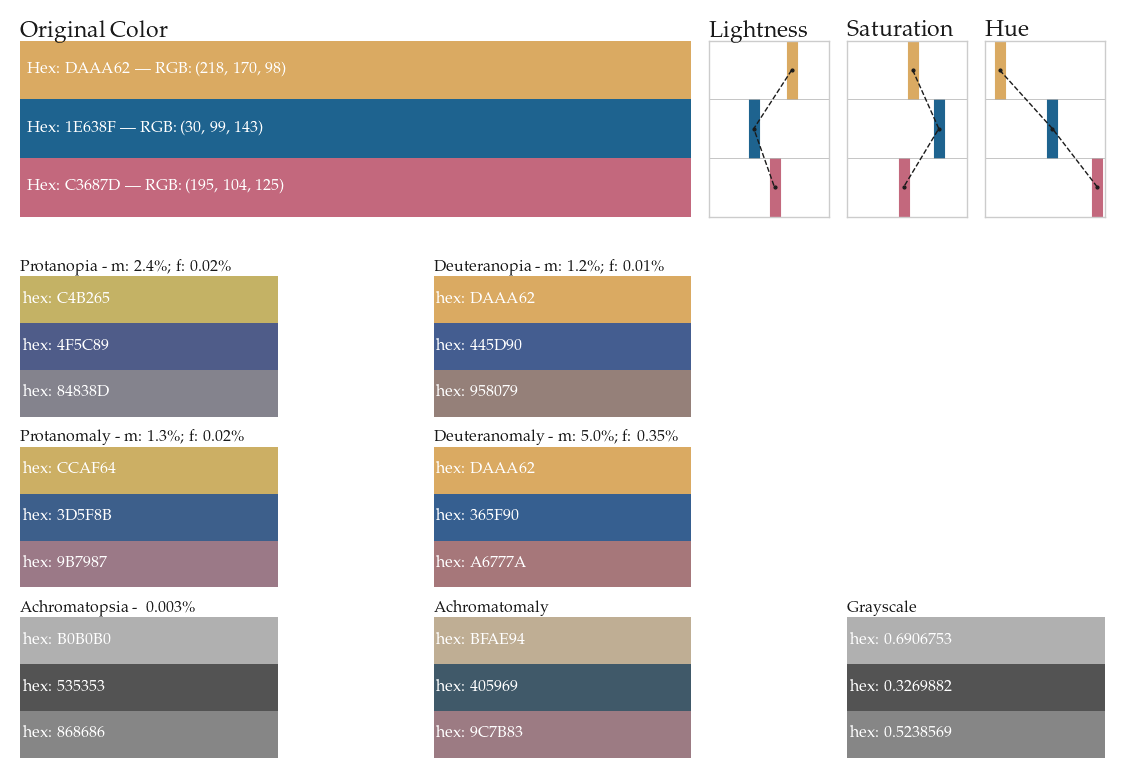

In [10]:
w = 2.0
h = 2.0
ncols = 3
nrows = 3
tups = list(it.product(range(nrows), range(ncols)))
tups = [(i[0]+2,i[1]) for i in tups]

fig = plt.figure(figsize=(7,3.25+len(cols1)*0.5),dpi=200)
plt.subplots_adjust(wspace=0.15,hspace=0.175+0.025*len(cols1))
gs = fig.add_gridspec(5,8,height_ratios=[1.25,0,1,1,1])

for i,cb in enumerate(all_vals):
    if i == 0:
        axi = fig.add_subplot(gs[0,0:5])
    else:
        axi = fig.add_subplot(gs[tups[i-1][0],(tups[i-1][1]*3):(tups[i-1][1]*3)+2])

    if cb in ['Tritanopia','Tritanomaly']:
        axi.set_axis_off()
        continue

    cols1_dict_cb = [cols1_dict[col][cb] for col in cols1]
    rv0 = 1/len(cols1_dict_cb)
    for li,rv in enumerate(np.linspace(rv0,1,len(cols1_dict_cb))):
        lv = rv-rv0
        axi.fill_between([0,1],lv,rv,lw=0,color=cols1_dict_cb[li])
        if i == 0:
            ttt = "Hex: %s"%cols1_dict_cb[li].replace('#','')
            ttt = ttt + ' --- RGB: %s'%str(hex_to_rgb(cols1_dict_cb[li]))
            axi.text(0.99,(lv+rv)/2,ttt,
                     color='w', fontsize='xx-small',ha='left',va='center')
            
        else:
            axi.text(0.99,(lv+rv)/2,"hex: %s"%cols1_dict_cb[li].replace('#',''),
                     color='w', fontsize='xx-small',ha='left',va='center')

    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_xlim(1,0)
    axi.set_ylim(1,0)
    axi.set_axis_off()
    if i == 0:
        axi.set_title(cb,ha='left',x=0,color=labcol,va='top',
                      y=1.01+len(cols1)*0.005,fontsize='small')
    else:
        axi.set_title(cb+colorblind_rates[cb],ha='left',x=0,color=labcol,
                      va='top',y=1.0,fontsize='xx-small')

lightn = [lightness(c) for c in cols1]
saturn = [saturation(c) for c in cols1]
huen = [hue(c) for c in cols1]
titles = ['Lightness','Saturation','Hue']
ylims = [(-0.05, 1.05),(-0.05, 1.05),(-10, 370)]
for vi,v in enumerate([lightn,saturn,huen]):
    axi = fig.add_subplot(gs[0,vi+5])
    axi.vlines(v,[i+0 for i in range(len(cols1))],
                 [i+1 for i in range(len(cols1))], color=cols1, lw=4)
    axi.plot(v,[i+0.5 for i in range(len(cols1))],color=labcol,
             lw=0.5, ls='--',marker='.',markersize=1)

    axi.set_title(titles[vi],ha='left',x=0,color=labcol,va='top',
                   y=1.01+len(cols1)*0.005,fontsize='small')

    axi.set_ylim(len(cols1),0)
    axi.hlines(np.linspace(1,len(cols1),len(cols1)),
               ylims[vi][0],ylims[vi][1], lw=0.2, color='.6')
    axi.set_xlim(ylims[vi][0],ylims[vi][1])
    axi.set_xticks([])
    axi.set_yticks([])
    axi.tick_params(pad=2, colors='.3', length=0)
    for r in ['bottom','top','right','left']:
        axi.spines[r].set_color('.8')
        axi.spines[r].set_linewidth(0.5)


plt.savefig('figs/pngs/color_explorer_%s.png'%cmap_name.replace(' ',''),
            dpi=600,bbox_inches='tight')
plt.show()

_____________

# Test Colormap 3

In [11]:
cmap_name = 'Test Colormap 3'
cols1 = ['#01497c','#C74769','#b3b3b3','#008795','#629cc0','#dea8ab','#c8c0dd']
cols1_dict = {}
for col in cols1:
    col1_dict = get_colorblindness_colors(col)
    cols1_dict[col] = col1_dict[col]

https://convertingcolors.com/hex-color-01497c.html
https://convertingcolors.com/hex-color-C74769.html
https://convertingcolors.com/hex-color-b3b3b3.html
https://convertingcolors.com/hex-color-008795.html
https://convertingcolors.com/hex-color-629cc0.html
https://convertingcolors.com/hex-color-dea8ab.html
https://convertingcolors.com/hex-color-c8c0dd.html


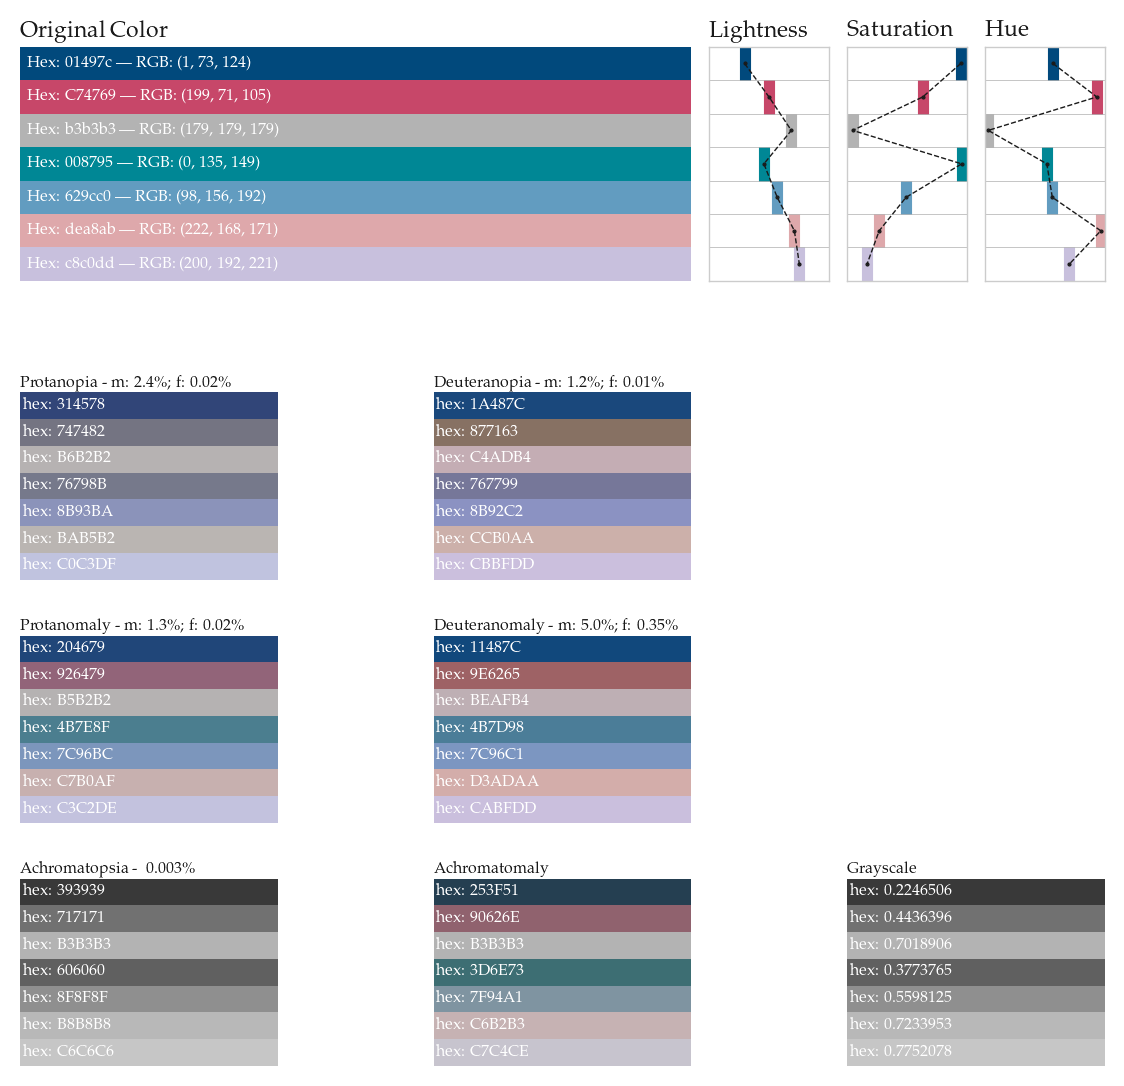

In [12]:
w = 2.0
h = 2.0
ncols = 3
nrows = 3
tups = list(it.product(range(nrows), range(ncols)))
tups = [(i[0]+2,i[1]) for i in tups]

fig = plt.figure(figsize=(7,3.25+len(cols1)*0.5),dpi=200)
plt.subplots_adjust(wspace=0.15,hspace=0.175+0.025*len(cols1))
gs = fig.add_gridspec(5,8,height_ratios=[1.25,0,1,1,1])

for i,cb in enumerate(all_vals):
    if i == 0:
        axi = fig.add_subplot(gs[0,0:5])
    else:
        axi = fig.add_subplot(gs[tups[i-1][0],(tups[i-1][1]*3):(tups[i-1][1]*3)+2])

    if cb in ['Tritanopia','Tritanomaly']:
        axi.set_axis_off()
        continue

    cols1_dict_cb = [cols1_dict[col][cb] for col in cols1]
    rv0 = 1/len(cols1_dict_cb)
    for li,rv in enumerate(np.linspace(rv0,1,len(cols1_dict_cb))):
        lv = rv-rv0
        axi.fill_between([0,1],lv,rv,lw=0,color=cols1_dict_cb[li])
        if i == 0:
            ttt = "Hex: %s"%cols1_dict_cb[li].replace('#','')
            ttt = ttt + ' --- RGB: %s'%str(hex_to_rgb(cols1_dict_cb[li]))
            axi.text(0.99,(lv+rv)/2,ttt,
                     color='w', fontsize='xx-small',ha='left',va='center')
            
        else:
            axi.text(0.99,(lv+rv)/2,"hex: %s"%cols1_dict_cb[li].replace('#',''),
                     color='w', fontsize='xx-small',ha='left',va='center')

    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_xlim(1,0)
    axi.set_ylim(1,0)
    axi.set_axis_off()
    if i == 0:
        axi.set_title(cb,ha='left',x=0,color=labcol,va='top',
                      y=1.01+len(cols1)*0.005,fontsize='small')
    else:
        axi.set_title(cb+colorblind_rates[cb],ha='left',x=0,color=labcol,
                      va='top',y=1.0,fontsize='xx-small')

lightn = [lightness(c) for c in cols1]
saturn = [saturation(c) for c in cols1]
huen = [hue(c) for c in cols1]
titles = ['Lightness','Saturation','Hue']
ylims = [(-0.05, 1.05),(-0.05, 1.05),(-10, 370)]
for vi,v in enumerate([lightn,saturn,huen]):
    axi = fig.add_subplot(gs[0,vi+5])
    axi.vlines(v,[i+0 for i in range(len(cols1))],
                 [i+1 for i in range(len(cols1))], color=cols1, lw=4)
    axi.plot(v,[i+0.5 for i in range(len(cols1))],color=labcol,
             lw=0.5, ls='--',marker='.',markersize=1)

    axi.set_title(titles[vi],ha='left',x=0,color=labcol,va='top',
                   y=1.01+len(cols1)*0.005,fontsize='small')

    axi.set_ylim(len(cols1),0)
    axi.hlines(np.linspace(1,len(cols1),len(cols1)),
               ylims[vi][0],ylims[vi][1], lw=0.2, color='.6')
    axi.set_xlim(ylims[vi][0],ylims[vi][1])
    axi.set_xticks([])
    axi.set_yticks([])
    axi.tick_params(pad=2, colors='.3', length=0)
    for r in ['bottom','top','right','left']:
        axi.spines[r].set_color('.8')
        axi.spines[r].set_linewidth(0.5)


plt.savefig('figs/pngs/color_explorer_%s.png'%cmap_name.replace(' ',''),
            dpi=600,bbox_inches='tight')
plt.show()

____________

# Test Colormap 4

In [13]:
cmap_name = 'Test Colormap 4'
cols1 = ['#01497c','#C74769','#b3b3b3']
cols1_dict = {}
for col in cols1:
    col1_dict = get_colorblindness_colors(col)
    cols1_dict[col] = col1_dict[col]

https://convertingcolors.com/hex-color-01497c.html
https://convertingcolors.com/hex-color-C74769.html
https://convertingcolors.com/hex-color-b3b3b3.html


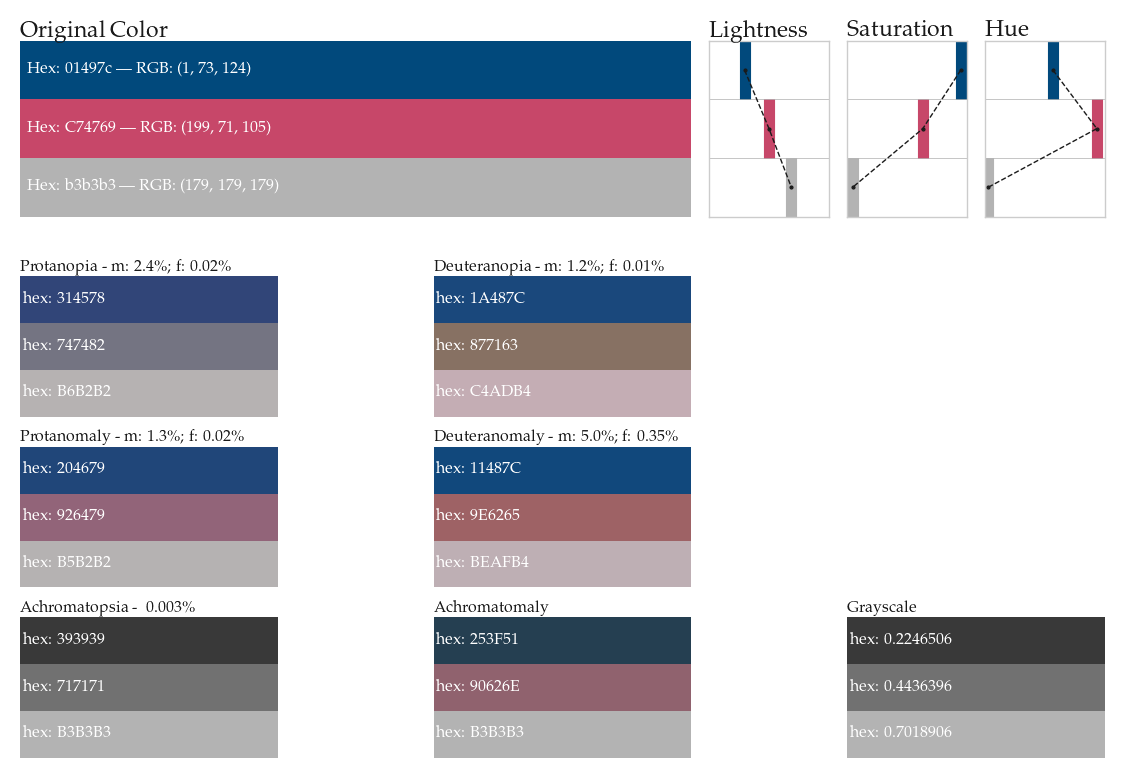

In [14]:
w = 2.0
h = 2.0
ncols = 3
nrows = 3
tups = list(it.product(range(nrows), range(ncols)))
tups = [(i[0]+2,i[1]) for i in tups]

fig = plt.figure(figsize=(7,3.25+len(cols1)*0.5),dpi=200)
plt.subplots_adjust(wspace=0.15,hspace=0.175+0.025*len(cols1))
gs = fig.add_gridspec(5,8,height_ratios=[1.25,0,1,1,1])

for i,cb in enumerate(all_vals):
    if i == 0:
        axi = fig.add_subplot(gs[0,0:5])
    else:
        axi = fig.add_subplot(gs[tups[i-1][0],(tups[i-1][1]*3):(tups[i-1][1]*3)+2])

    if cb in ['Tritanopia','Tritanomaly']:
        axi.set_axis_off()
        continue

    cols1_dict_cb = [cols1_dict[col][cb] for col in cols1]
    rv0 = 1/len(cols1_dict_cb)
    for li,rv in enumerate(np.linspace(rv0,1,len(cols1_dict_cb))):
        lv = rv-rv0
        axi.fill_between([0,1],lv,rv,lw=0,color=cols1_dict_cb[li])
        if i == 0:
            ttt = "Hex: %s"%cols1_dict_cb[li].replace('#','')
            ttt = ttt + ' --- RGB: %s'%str(hex_to_rgb(cols1_dict_cb[li]))
            axi.text(0.99,(lv+rv)/2,ttt,
                     color='w', fontsize='xx-small',ha='left',va='center')
            
        else:
            axi.text(0.99,(lv+rv)/2,"hex: %s"%cols1_dict_cb[li].replace('#',''),
                     color='w', fontsize='xx-small',ha='left',va='center')

    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_xlim(1,0)
    axi.set_ylim(1,0)
    axi.set_axis_off()
    if i == 0:
        axi.set_title(cb,ha='left',x=0,color=labcol,va='top',
                      y=1.01+len(cols1)*0.005,fontsize='small')
    else:
        axi.set_title(cb+colorblind_rates[cb],ha='left',x=0,color=labcol,
                      va='top',y=1.0,fontsize='xx-small')

lightn = [lightness(c) for c in cols1]
saturn = [saturation(c) for c in cols1]
huen = [hue(c) for c in cols1]
titles = ['Lightness','Saturation','Hue']
ylims = [(-0.05, 1.05),(-0.05, 1.05),(-10, 370)]
for vi,v in enumerate([lightn,saturn,huen]):
    axi = fig.add_subplot(gs[0,vi+5])
    axi.vlines(v,[i+0 for i in range(len(cols1))],
                 [i+1 for i in range(len(cols1))], color=cols1, lw=4)
    axi.plot(v,[i+0.5 for i in range(len(cols1))],color=labcol,
             lw=0.5, ls='--',marker='.',markersize=1)

    axi.set_title(titles[vi],ha='left',x=0,color=labcol,va='top',
                   y=1.01+len(cols1)*0.005,fontsize='small')

    axi.set_ylim(len(cols1),0)
    axi.hlines(np.linspace(1,len(cols1),len(cols1)),
               ylims[vi][0],ylims[vi][1], lw=0.2, color='.6')
    axi.set_xlim(ylims[vi][0],ylims[vi][1])
    axi.set_xticks([])
    axi.set_yticks([])
    axi.tick_params(pad=2, colors='.3', length=0)
    for r in ['bottom','top','right','left']:
        axi.spines[r].set_color('.8')
        axi.spines[r].set_linewidth(0.5)


plt.savefig('figs/pngs/color_explorer_%s.png'%cmap_name.replace(' ',''),
            dpi=600,bbox_inches='tight')
plt.show()